## Lead Scoring Case Study
#### by Rohit Nigam and Sayantan De

First we set the width of the notebook. This helps when we are dealing with large dataframes.

In [14]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
""")) 

Next, we import the libraries necessary at this time. We will import others as the need arises.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

We are suppressing all warnings.

In [16]:
import warnings
warnings.filterwarnings('ignore') 

And now we set the our preferred options for the notebook, in reference to the imported libraries.

In [17]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 500)
sns.set_style(style='darkgrid') 

### Reading the data

We will read the data into pandas and inspect it.

In [18]:
df_leads = pd.read_csv('Leads.csv')
df_leads.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      object
Lead Number                                      int64
Lead Origin                                      object
Lead Source                                      object
Do Not Email                                     object
Do Not Call                                      object
Converted                                        int64
TotalVisits                                      float64
Total Time Spent on Website                      int64
Page Views Per Visit                             float64
Last Activity                                    object
Country                                          object
Specialization                                   object
How did you hear about X Education               object
What is your current occupation                  object
What matters most to you in choosing a course    objec

In [19]:
df_leads.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [20]:
df_leads.shape

(9240, 37)

Let's do a quick EDA with visualisations. We will start with categorical variables.

<Figure size 1800x5040 with 0 Axes>

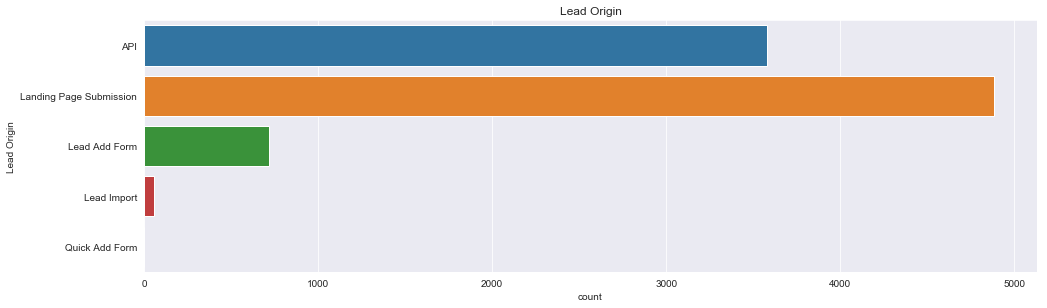

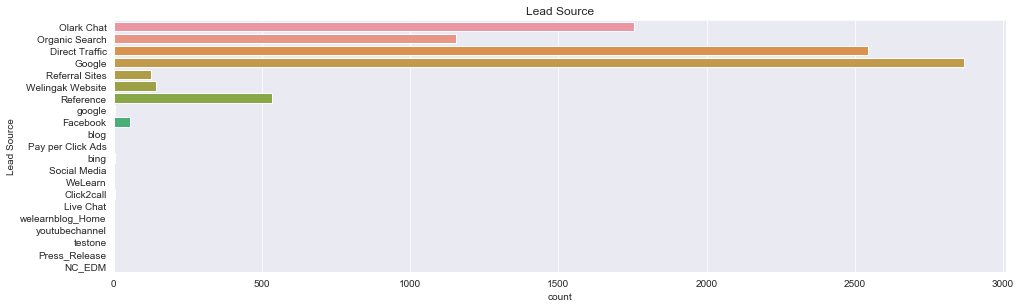

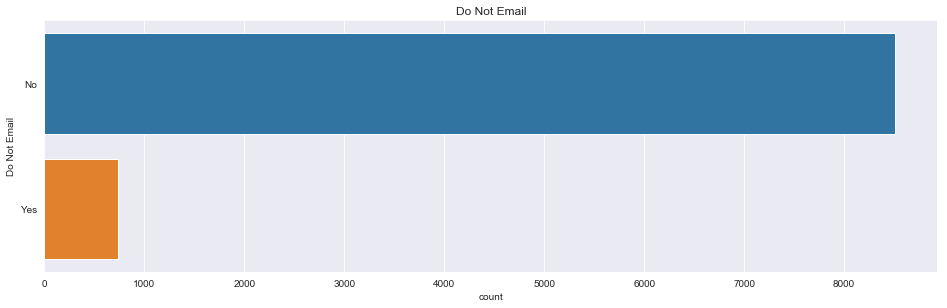

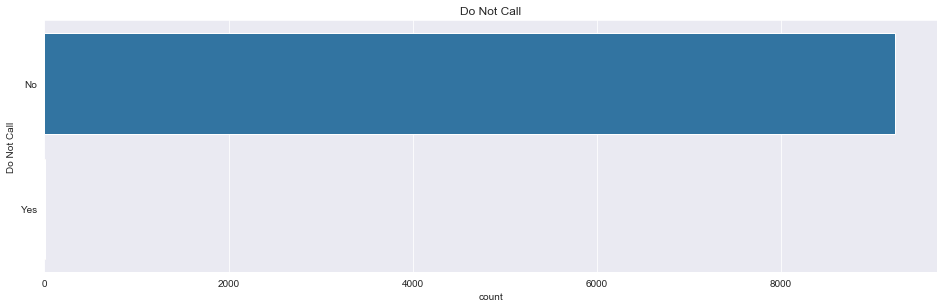

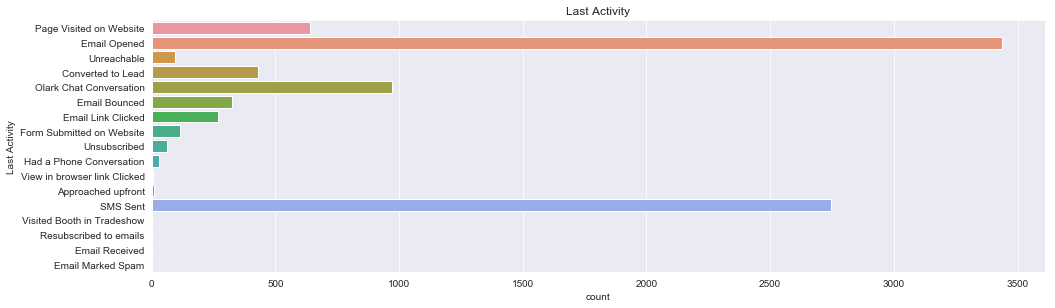

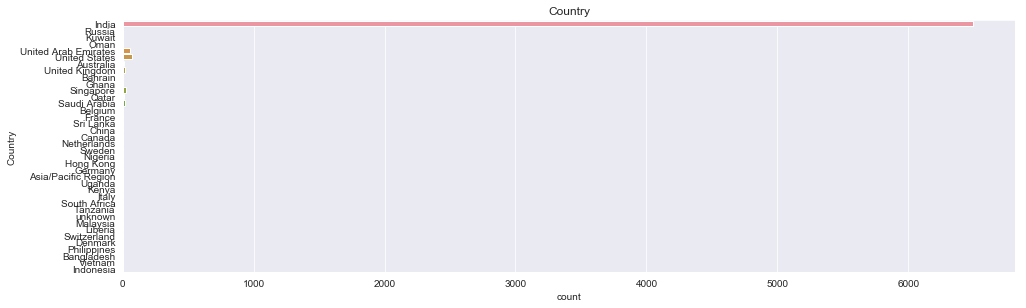

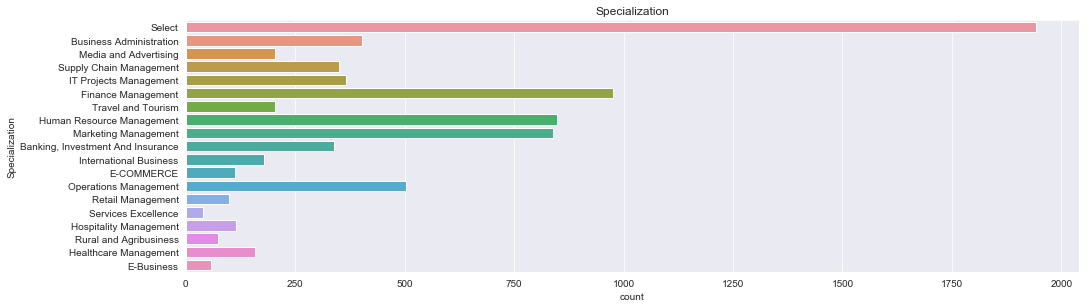

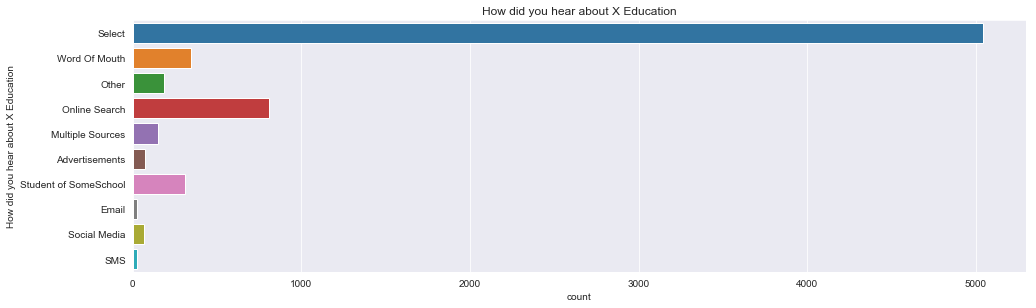

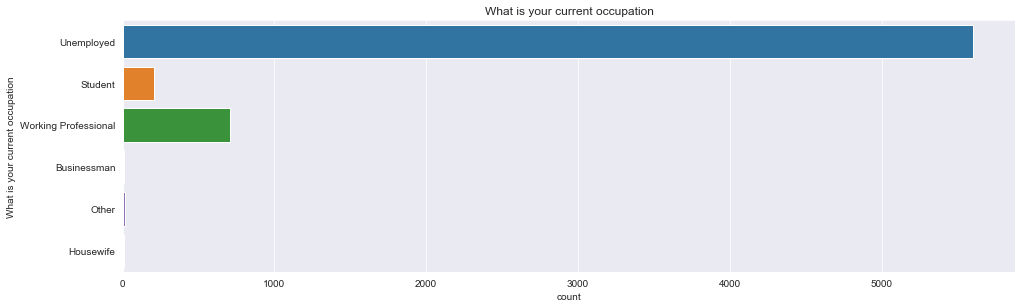

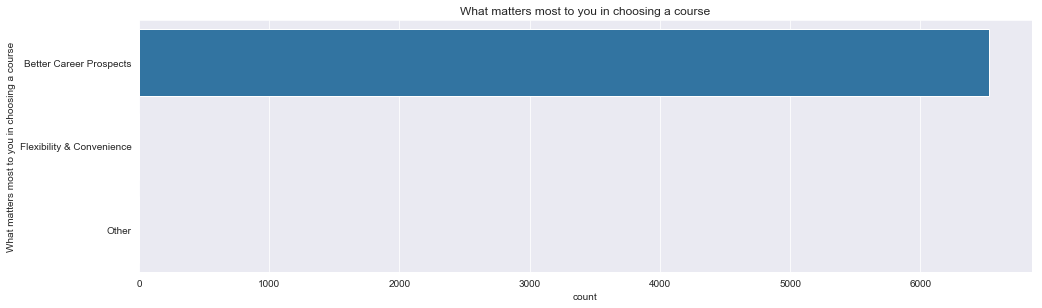

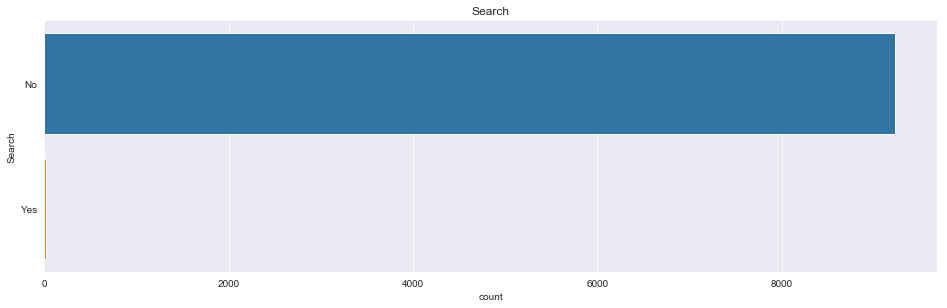

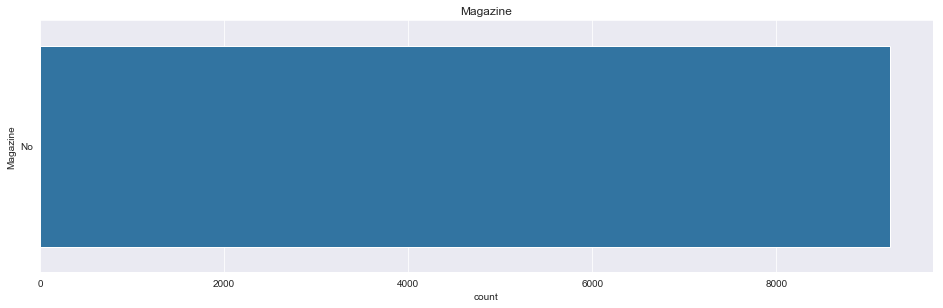

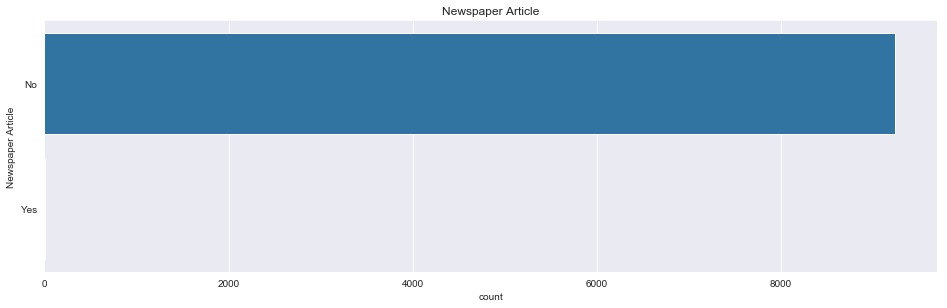

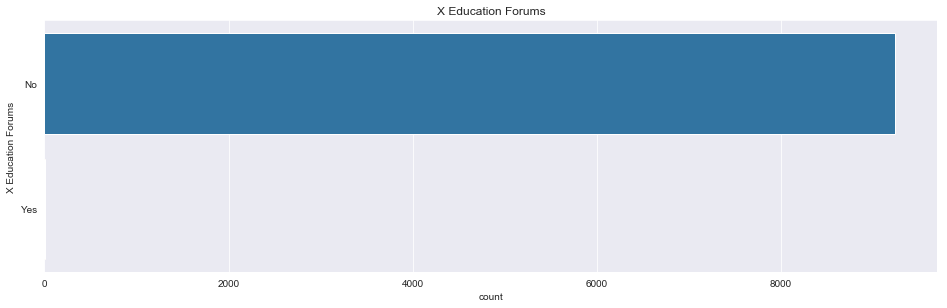

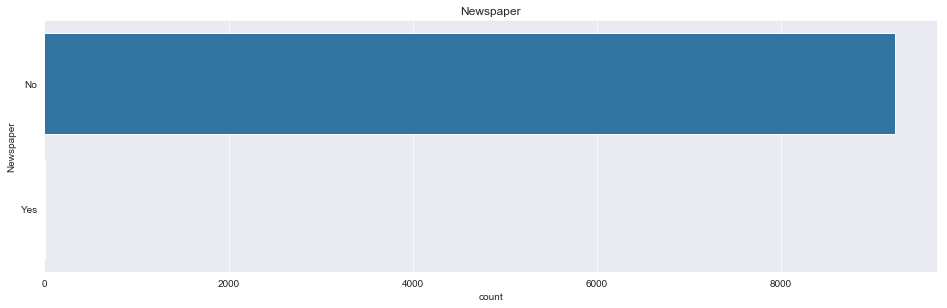

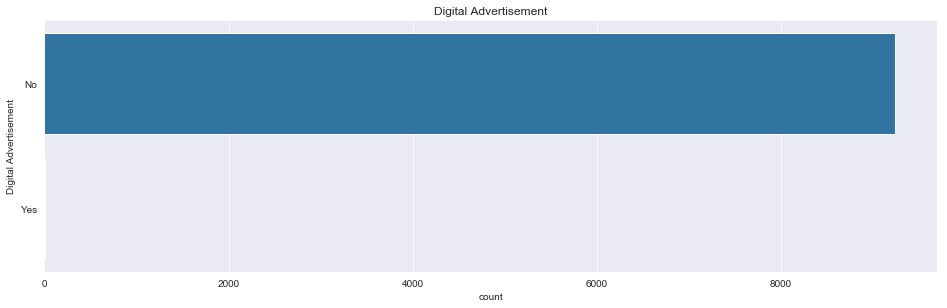

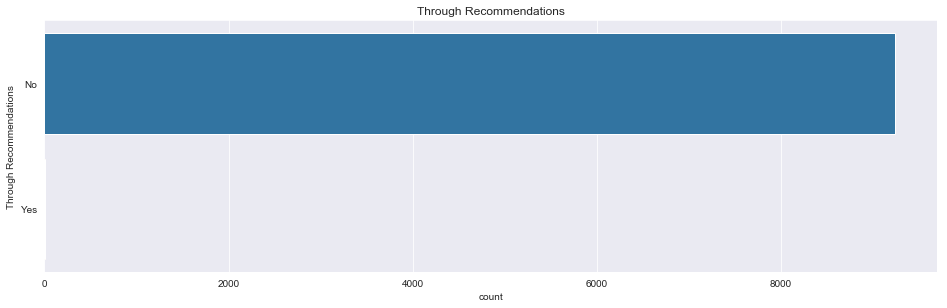

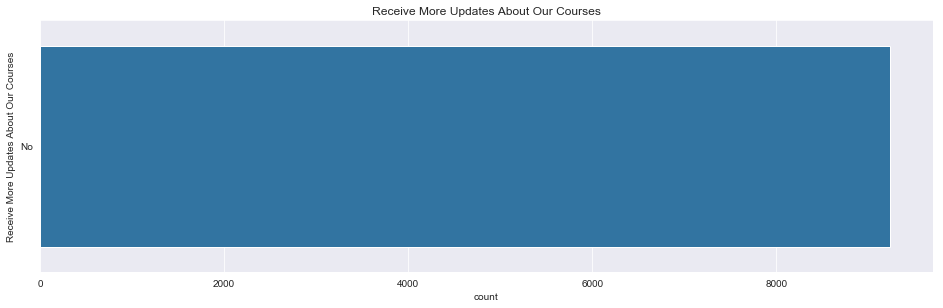

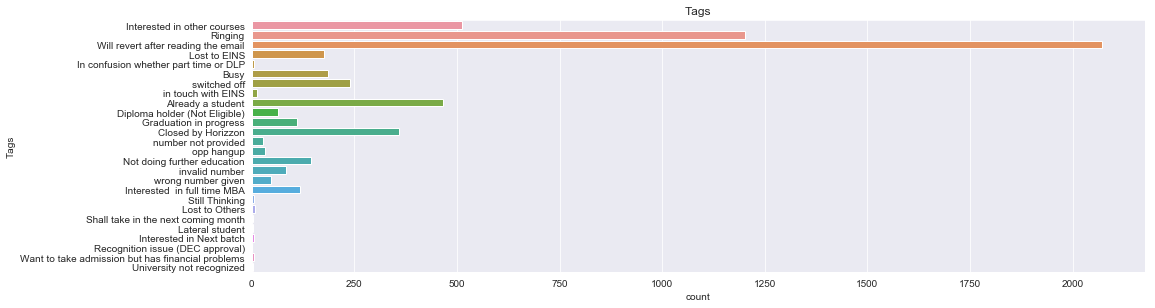

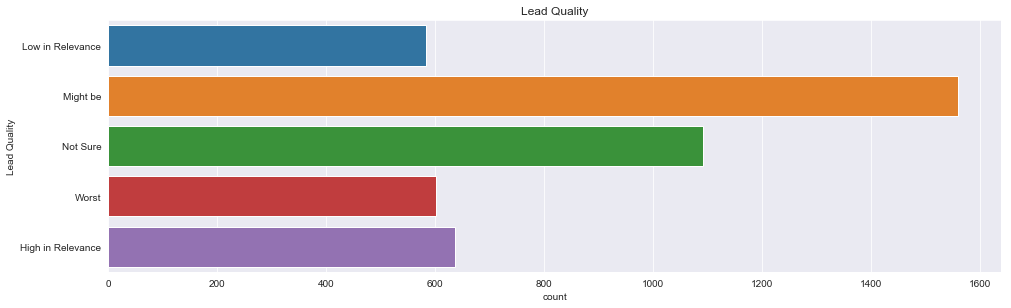

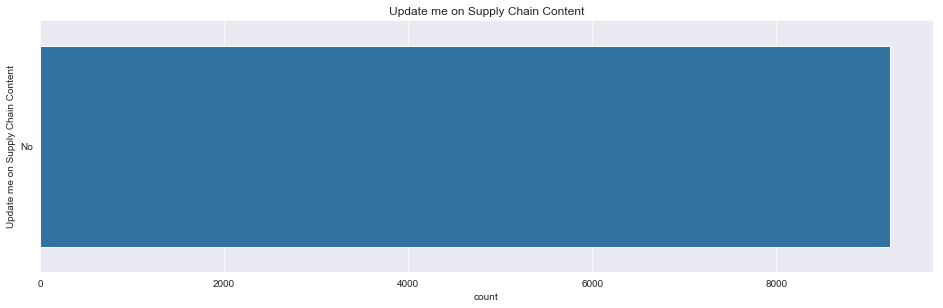

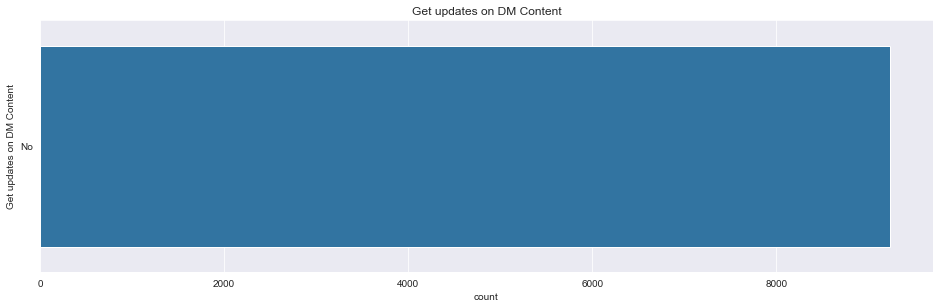

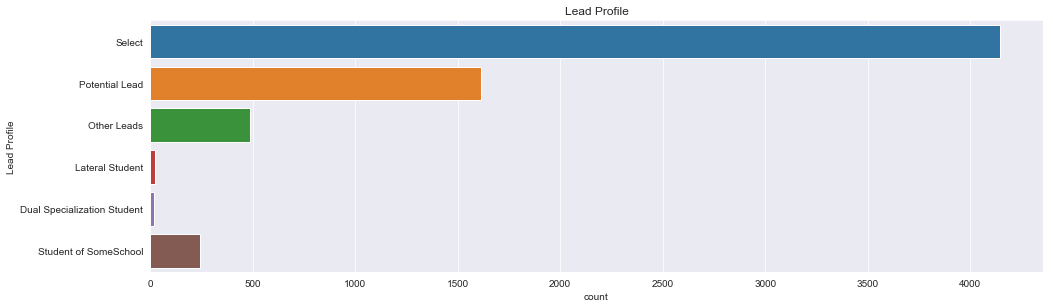

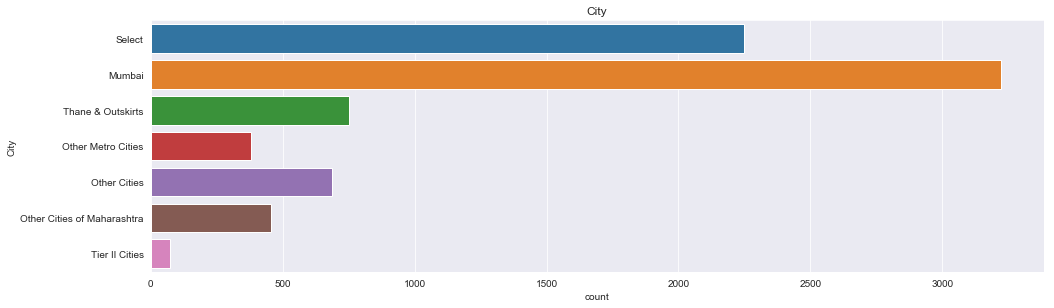

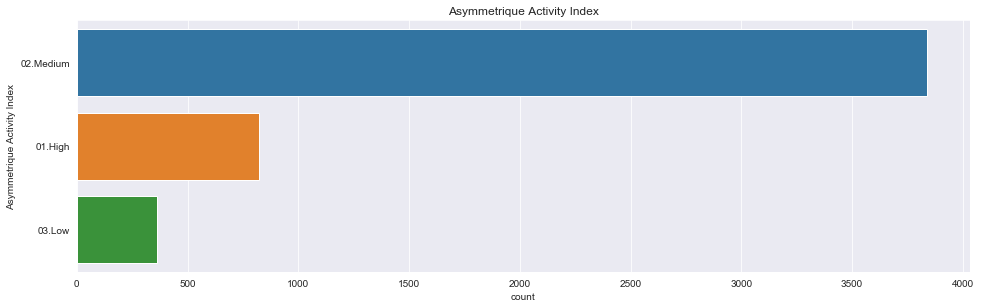

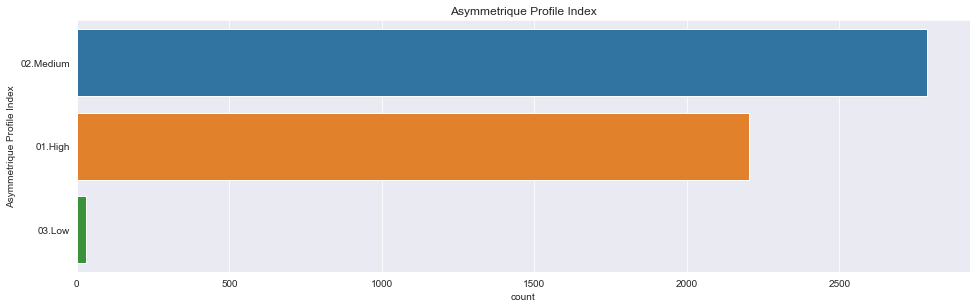

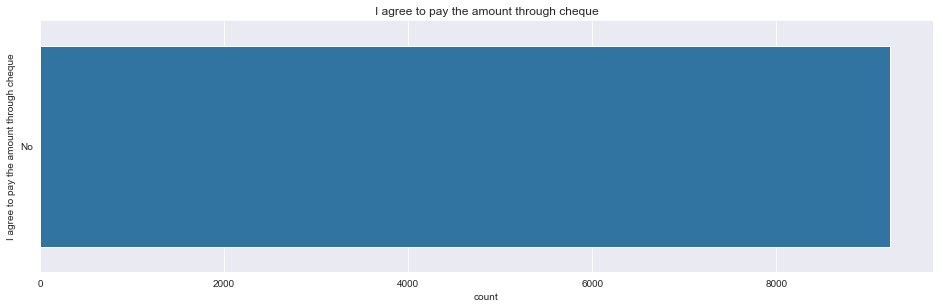

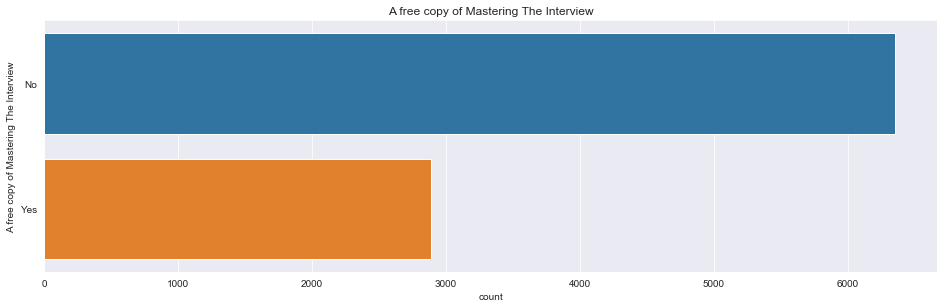

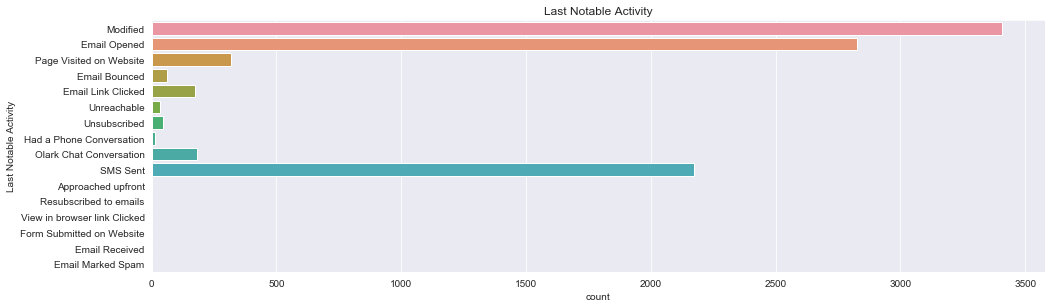

In [21]:
df_obj = df_leads.select_dtypes(object)
col = list(df_obj.columns)[1:]
plt.figure(figsize=[25,70]) 
for i in enumerate(col):
    plt.figure(figsize=[16,160]) 
    plt.subplot(29,1, i[0]+1)
    sns.countplot(y = i[1], data=df_obj) 
    plt.title(i[1])
    plt.show() 

Let's take a look at the numerical variables.

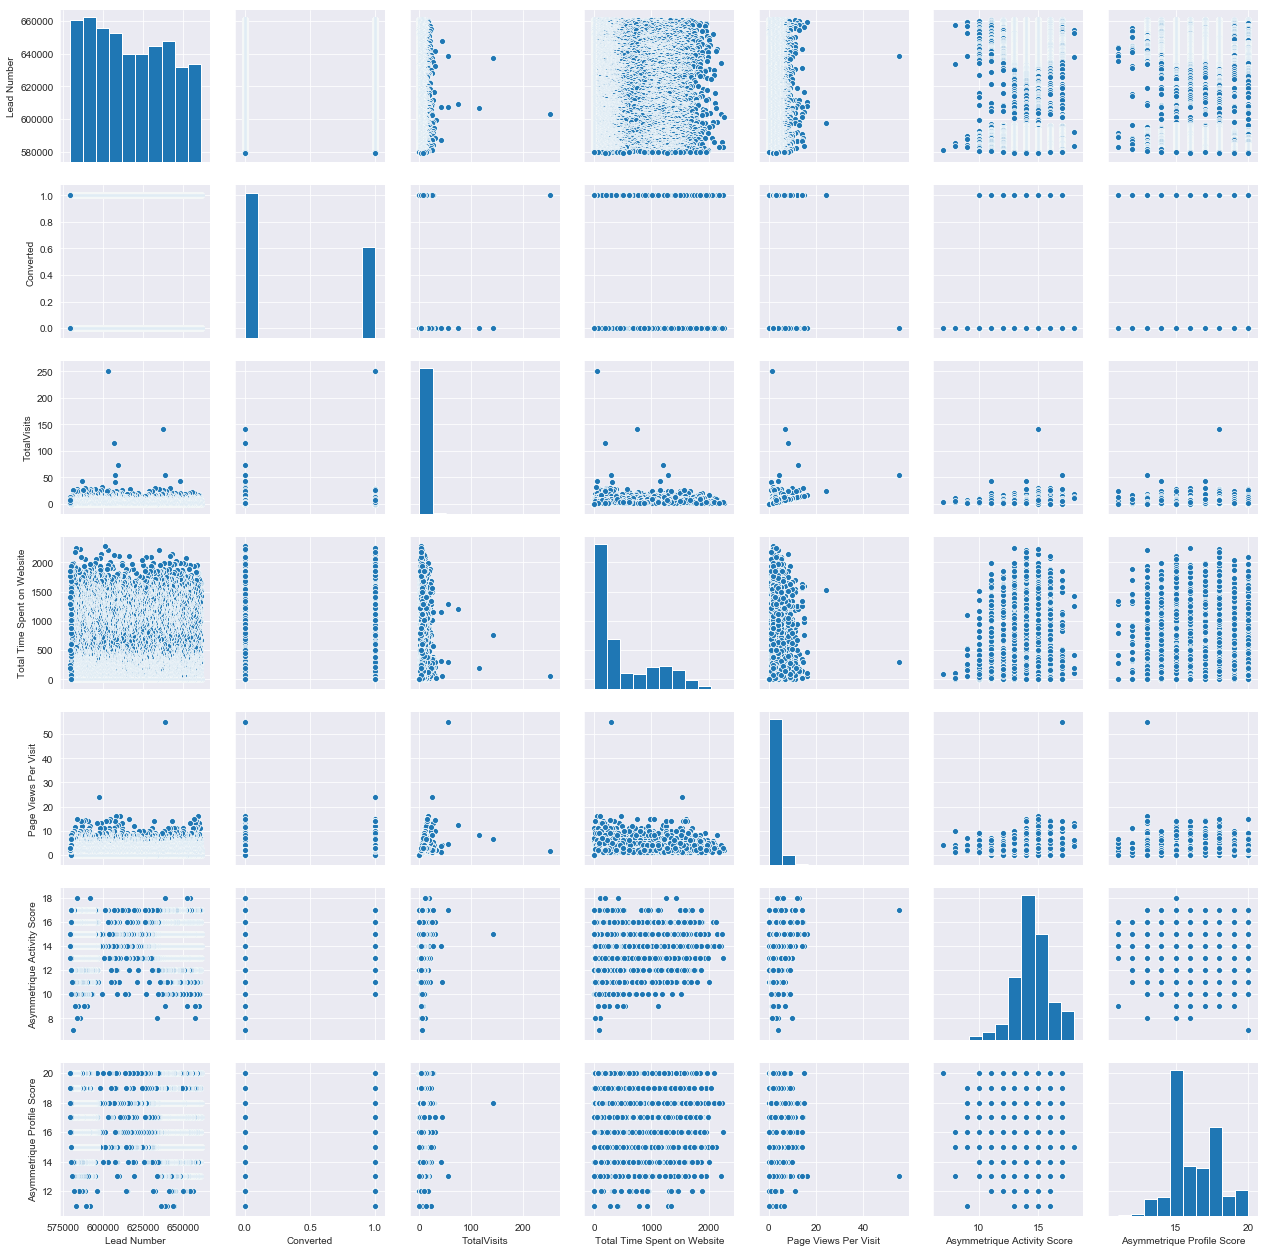

In [22]:
df_num = df_leads.select_dtypes(np.number)
col = list(df_num.columns)[1:]
#plt.figure(figsize=[25,70]) 
sns.pairplot(data=df_num) 
plt.show() 

These plots show us what kind of impact each of the independent variable may have on the prediction.

In [23]:
coversion_score  = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
print(coversion_score) 

38.53896103896104


### Handling Missing Values

We are defining a function to display nulls as we are going to use this again and again.

In [24]:
def display_nulls(df):
    df_nulls = pd.DataFrame(df.isna().sum(axis=0)).reset_index()
    df_nulls.columns = ['Field', 'Counts']
    df_nulls['percent'] = df_nulls.Counts/df_leads.shape[0] * 100
    df_nulls = df_nulls[df_nulls.Counts!=0]
    df_nulls.sort_values(by='percent', ascending=False)
    return df_nulls

In [25]:
display_nulls(df_leads) 

,Field,Counts,percent
3,Lead Source,36,0.389610
7,TotalVisits,137,1.482684
9,Page Views Per Visit,137,1.482684
10,Last Activity,103,1.114719
11,Country,2461,26.634199
12,Specialization,1438,15.562771
13,How did you hear about X Education,2207,23.885281
14,What is your current occupation,2690,29.112554
15,What matters most to you in choosing a course,2709,29.318182
24,Tags,3353,36.287879


We can see that there are quite a bit of null values to take care of before we get to modeling.

We will check for rows which have 10 or more missing values.

In [26]:
df_leads[df_leads.isna().sum(axis=1) >= 10].shape

(1043, 37)

We will now drop the rows which have 10 or more missing values.

In [27]:
df_leads_clean = df_leads[df_leads.isna().sum(axis=1) < 10]
df_leads_clean.shape

(8197, 37)

We are still left with a quite a large percentage of the original data.

We will now define a function to impute values with 'NA'.

In [28]:
def impute_NA(df, col):
    df = df.loc[df[col].isna(), col ] = 'NA'
    return df

We will now remove all the columns which have a single unique value as they bring in no variance, and hence contain no useful information.

In [29]:
cols = list(df_leads_clean.columns)
for f in cols:
    if df_leads_clean[f].unique().shape[0] == 1:
        df_leads_clean.drop(columns=f, inplace=True)
df_leads_clean.shape

(8197, 32)

We will now take a look at the four Asymmetric variables, which have a large percentage of missing values.

In [30]:
for c in df_leads.columns:
    if 'Asymmetrique' in c:
        print (c)
        df_count=pd.DataFrame(df_leads[c].value_counts()).reset_index()
        df_count.columns = ['1',  '2']
        print (df_count) 

Asymmetrique Activity Index
           1     2
0  02.Medium  3839
1    01.High   821
2     03.Low   362
Asymmetrique Profile Index
           1     2
0  02.Medium  2788
1    01.High  2203
2     03.Low    31
Asymmetrique Activity Score
       1     2
0   14.0  1771
1   15.0  1293
2   13.0   775
3   16.0   467
4   17.0   349
5   12.0   196
6   11.0    95
7   10.0    57
8    9.0     9
9   18.0     5
10   8.0     4
11   7.0     1
Asymmetrique Profile Score
      1     2
0  15.0  1759
1  18.0  1071
2  16.0   599
3  17.0   579
4  20.0   308
5  19.0   245
6  14.0   226
7  13.0   204
8  12.0    22
9  11.0     9


The activity index is a derived column over the score columns and hence can be dropped. However, we also need to consider imputing the missing values in this columns, and it will be much easier to impute indexes rather than scores. So we will drop the scores columns, and keep the indexes.

In [31]:
df_leads_clean.drop(columns=['Asymmetrique Activity Score','Asymmetrique Profile Score'], inplace=True)
df_leads_clean.shape

(8197, 30)

In [32]:
df_leads_clean['Lead Quality'].value_counts() 

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

The columns Asymmetrique Indexes and Lead Quality are important ones, however they have about 50% missing values. Therefore we cannot drop either rows or columns. Let us impute the missing values to 'NA' (not available).

In [33]:
df_leads_clean.loc[df_leads_clean['Lead Quality'].isna(), 'Lead Quality'] = 'NA'
print (df_leads_clean['Lead Quality'].value_counts()) 

NA                   3724
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


In [34]:
for col in ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']:
    df_leads_clean.loc[df_leads_clean[col].isna(), col] = None
    print (df_leads_clean[col].value_counts()) 

02.Medium    3833
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
02.Medium    2781
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


In [35]:
display_nulls(df_leads_clean) 

,Field,Counts,percent
3,Lead Source,34,0.367965
7,TotalVisits,127,1.374459
9,Page Views Per Visit,127,1.374459
10,Last Activity,101,1.093074
11,Country,2037,22.045455
12,Specialization,765,8.279221
13,How did you hear about X Education,1168,12.640693
14,What is your current occupation,1664,18.008658
15,What matters most to you in choosing a course,1669,18.062771
22,Tags,2318,25.086580


We have dealt with Asymmetrique Indexes and Lead Quality. No we will take a look at the Tags column.

In [36]:
df_leads_clean.Tags.value_counts() 

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          171
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

We will impute to 'NA' for tags as well.

In [37]:
df_leads_clean.loc[df_leads_clean['Tags'].isna(), 'Tags'] = 'NA'

Let's check the country column.

In [38]:
df_leads_clean.Country.value_counts() 

India                   5909
United States             60
United Arab Emirates      47
Singapore                 22
Saudi Arabia              18
United Kingdom            12
Australia                 12
Qatar                      9
Hong Kong                  6
France                     6
Bahrain                    6
Oman                       5
Kuwait                     4
South Africa               4
Nigeria                    4
Sweden                     3
Germany                    3
Canada                     3
Bangladesh                 2
unknown                    2
Uganda                     2
Belgium                    2
Philippines                2
China                      2
Netherlands                2
Ghana                      2
Italy                      1
Sri Lanka                  1
Russia                     1
Asia/Pacific Region        1
Malaysia                   1
Vietnam                    1
Kenya                      1
Tanzania                   1
Denmark       

We are imputing here with the mode, the value with the highest frequency, which is 'India'.

In [39]:
df_leads_clean.loc[df_leads_clean['Country'].isna(), 'Country'] = 'India'

Also, we have way too many countries and it won't be possible to have one hot encoding on Country. Let's make the profiles Indians or Non Indians.

In [40]:
df_leads_clean['IsIndian'] = df_leads_clean['Country'].apply(lambda x : 1 if x=='India' else 0)
df_leads_clean['IsIndian'].value_counts()
df_leads_clean.drop(columns='Country', inplace=True) 

In [41]:
df_leads_clean.shape

(8197, 30)

In [42]:
display_nulls(df_leads_clean) 

,Field,Counts,percent
3,Lead Source,34,0.367965
7,TotalVisits,127,1.374459
9,Page Views Per Visit,127,1.374459
10,Last Activity,101,1.093074
11,Specialization,765,8.279221
12,How did you hear about X Education,1168,12.640693
13,What is your current occupation,1664,18.008658
14,What matters most to you in choosing a course,1669,18.062771
23,Lead Profile,1669,18.062771
24,City,764,8.268398


We have gotten rid of a considerable amount of missing values. Let's take a look at some other variables.

In [43]:
df_leads_clean['What matters most to you in choosing a course'].value_counts() 

Better Career Prospects      6525
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can't impute with 'Better Career Prospects, as that will remove any variance in the data, so instead we are simply dropping this column.

In [44]:
df_leads_clean.drop(columns='What matters most to you in choosing a course', inplace=True) 

In [45]:
display_nulls(df_leads_clean) 

,Field,Counts,percent
3,Lead Source,34,0.367965
7,TotalVisits,127,1.374459
9,Page Views Per Visit,127,1.374459
10,Last Activity,101,1.093074
11,Specialization,765,8.279221
12,How did you hear about X Education,1168,12.640693
13,What is your current occupation,1664,18.008658
22,Lead Profile,1669,18.062771
23,City,764,8.268398
24,Asymmetrique Activity Index,3182,34.437229


In [46]:
df_leads_clean['Lead Profile'].value_counts() 

Select                         4143
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

We are imputing to 'NA' as we really don't know that unknown were selected.

In [47]:
df_leads_clean.loc[df_leads_clean['Lead Profile'].isna(), 'Lead Profile'] = 'NA'
df_leads_clean['Lead Profile'].value_counts() 

Select                         4143
NA                             1669
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [48]:
df_leads_clean['What is your current occupation'].value_counts() 

Unemployed              5597
Working Professional     704
Student                  198
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Just going by hunch, most of the candidates who have not mentioned their current occupation will be unemployed. Also, the median value is 'Unemployed', so we are imputing with this.

In [49]:
df_leads_clean.loc[df_leads_clean['What is your current occupation'].isna(), \
                  'What is your current occupation'] = 'Unemployed'
df_leads_clean['What is your current occupation'].value_counts() 

Unemployed              7261
Working Professional     704
Student                  198
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
df_leads_clean['How did you hear about X Education'].value_counts() 

Select                   5040
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      25
SMS                        23
Name: How did you hear about X Education, dtype: int64

This variable is a bit more tricky. The values are bit more spread out. We will keep the null values as 'NA' for now.

In [51]:
df_leads_clean.loc[df_leads_clean['How did you hear about X Education'].isna(), \
                   'How did you hear about X Education'] = 'NA'
df_leads_clean['How did you hear about X Education'].value_counts() 

Select                   5040
NA                       1168
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      25
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [52]:
display_nulls(df_leads_clean)

,Field,Counts,percent
3,Lead Source,34,0.367965
7,TotalVisits,127,1.374459
9,Page Views Per Visit,127,1.374459
10,Last Activity,101,1.093074
11,Specialization,765,8.279221
23,City,764,8.268398
24,Asymmetrique Activity Index,3182,34.437229
25,Asymmetrique Profile Index,3182,34.437229


Let us drop the rows with less than 2% missing values in columns 'Lead Score', 'TotalVisits', 'Page Views Per Visit' and 'Last Activity'.

In [53]:
df_leads_clean = df_leads_clean[~df_leads_clean['Lead Source'].isna() & \
                                ~df_leads_clean['TotalVisits'].isna() & \
                                ~df_leads_clean['Page Views Per Visit'].isna() & \
                                ~df_leads_clean['Last Activity'].isna()]
df_leads_clean.shape

(8041, 29)

In [54]:
display_nulls(df_leads_clean)

,Field,Counts,percent
11,Specialization,765,8.279221
23,City,764,8.268398
24,Asymmetrique Activity Index,3120,33.766234
25,Asymmetrique Profile Index,3120,33.766234


In [55]:
df_leads_clean['City'].value_counts() 

Mumbai                         2979
Select                         2156
Thane & Outskirts               699
Other Cities                    632
Other Cities of Maharashtra     406
Other Metro Cities              343
Tier II Cities                   62
Name: City, dtype: int64

'Select' is not a city. Let us keep the unknown cities and Select cities as 'NA'.

In [56]:
df_leads_clean.loc[df_leads_clean['City'].isna() | (df_leads_clean['City'] == 'Select'), 'City'] = 'NA'
df_leads_clean['City'].value_counts() 

Mumbai                         2979
NA                             2920
Thane & Outskirts               699
Other Cities                    632
Other Cities of Maharashtra     406
Other Metro Cities              343
Tier II Cities                   62
Name: City, dtype: int64

In [57]:
df_leads_clean['Specialization'].value_counts() 

Select                               1850
Finance Management                    899
Human Resource Management             806
Marketing Management                  786
Operations Management                 468
Business Administration               376
IT Projects Management                333
Supply Chain Management               327
Banking, Investment And Insurance     321
Media and Advertising                 186
Travel and Tourism                    175
International Business                163
Healthcare Management                 138
Hospitality Management                102
E-COMMERCE                             98
Retail Management                      91
Rural and Agribusiness                 68
E-Business                             54
Services Excellence                    35
Name: Specialization, dtype: int64

We will impute with 'NA' for this one as well.

In [58]:
df_leads_clean['Specialization'].fillna('NA', inplace=True)
df_leads_clean['Specialization'].value_counts() 

Select                               1850
Finance Management                    899
Human Resource Management             806
Marketing Management                  786
NA                                    765
Operations Management                 468
Business Administration               376
IT Projects Management                333
Supply Chain Management               327
Banking, Investment And Insurance     321
Media and Advertising                 186
Travel and Tourism                    175
International Business                163
Healthcare Management                 138
Hospitality Management                102
E-COMMERCE                             98
Retail Management                      91
Rural and Agribusiness                 68
E-Business                             54
Services Excellence                    35
Name: Specialization, dtype: int64

In [59]:
display_nulls(df_leads_clean) 

,Field,Counts,percent
24,Asymmetrique Activity Index,3120,33.766234
25,Asymmetrique Profile Index,3120,33.766234


We will impute NA for missing values in these two columns as well.

In [60]:
df_leads_clean['Asymmetrique Activity Index'].fillna('NA', inplace=True)
df_leads_clean['Asymmetrique Activity Index'].value_counts() 

02.Medium    3739
NA           3120
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [61]:
df_leads_clean['Asymmetrique Profile Index'].fillna('NA', inplace=True)
df_leads_clean['Asymmetrique Profile Index'].value_counts() 

NA           3120
02.Medium    2736
01.High      2154
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [62]:
display_nulls(df_leads_clean) 

,Field,Counts,percent


This is end of dealing with null values. Now we can start with creation of the dummy variables.

### Encoding / Creation of Dummy Variables

In [63]:
df_leads_clean.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,IsIndian
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,NA,02.Medium,02.Medium,No,Modified,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,No,No,No,No,No,No,Ringing,NA,Select,NA,02.Medium,02.Medium,No,Email Opened,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified,1


In [64]:
df_leads_clean.shape

(8041, 29)

Prospect ID is not required for predictive analysis.

In [65]:
df_leads_clean.drop(columns='Prospect ID', inplace=True)
df_leads_clean.shape

(8041, 28)

In [66]:
df_leads_clean.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'IsIndian'],
      dtype='object')

In [67]:
df_leads_clean.head() 

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,IsIndian
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,NA,02.Medium,02.Medium,No,Modified,1
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,No,No,No,No,No,No,Ringing,NA,Select,NA,02.Medium,02.Medium,No,Email Opened,1
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified,1
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified,1


Let us convert the Yes/No type variables to 1/0. These are the columns :  
- **Do Not Email**
- **Do Not Call**
- **Search**
- **Newspaper Article**
- **X Education Forums**
- **Newspaper**
- **Digital Advertisement**
- **Through Recommendations**

In [68]:
def convert_yesno(str):
    yesno_map = {'Yes':1, 'No':0}
    return str.map(yesno_map) 

In [69]:
bin_columns = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',\
               'Digital Advertisement', 'Through Recommendations']
df_leads_clean[bin_columns]  = df_leads_clean[bin_columns].apply(convert_yesno)
df_leads_clean.head() 

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,IsIndian
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,0,0,0,0,0,0,Interested in other courses,Low in Relevance,Select,NA,02.Medium,02.Medium,No,Modified,1
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,0,0,0,0,0,0,Ringing,NA,Select,NA,02.Medium,02.Medium,No,Email Opened,1
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,0,0,0,0,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,0,0,0,0,0,0,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified,1
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified,1


In [70]:
df_leads_clean.head() 

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,IsIndian
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,0,0,0,0,0,0,Interested in other courses,Low in Relevance,Select,NA,02.Medium,02.Medium,No,Modified,1
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,0,0,0,0,0,0,Ringing,NA,Select,NA,02.Medium,02.Medium,No,Email Opened,1
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,0,0,0,0,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,0,0,0,0,0,0,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified,1
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified,1


In [71]:
df_leads_clean.shape

(8041, 28)

In [72]:
df_leads_clean.select_dtypes(object).head() 

,Lead Origin,Lead Source,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Select,Select,Unemployed,Interested in other courses,Low in Relevance,Select,NA,02.Medium,02.Medium,No,Modified
1,API,Organic Search,Email Opened,Select,Select,Unemployed,Ringing,NA,Select,NA,02.Medium,02.Medium,No,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Select,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified
4,Landing Page Submission,Google,Converted to Lead,Select,Other,Unemployed,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified


In [73]:
df_leads_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8041 entries, 0 to 9239
Data columns (total 28 columns):
Lead Number                               int64
Lead Origin                               object
Lead Source                               object
Do Not Email                              int64
Do Not Call                               int64
Converted                                 int64
TotalVisits                               float64
Total Time Spent on Website               int64
Page Views Per Visit                      float64
Last Activity                             object
Specialization                            object
How did you hear about X Education        object
What is your current occupation           object
Search                                    int64
Newspaper Article                         int64
X Education Forums                        int64
Newspaper                                 int64
Digital Advertisement                     int64
Through Recommendat

In [74]:
str_columns = list(df_leads_clean.select_dtypes(object).columns)
numeric_columns = list(df_leads_clean.select_dtypes([np.int64, np.float64]).columns)
numeric_columns.remove('Lead Number')
numeric_columns.remove('Converted')
print (str_columns, '\n', numeric_columns) 

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 ['Do Not Email', 'Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'IsIndian']


### One Hot Encoding

In [75]:
df_dummies = pd.get_dummies(df_leads_clean[str_columns], drop_first=True)
df_numerics = df_leads_clean[numeric_columns] 

Putting the target variable as 'Converted'

In [76]:
y = df_leads_clean['Converted'] 

In [77]:
X = pd.concat([df_dummies, df_numerics], axis=1)
X.shape

(8041, 146)

Encoding complete, we move on to Test-Train Split.

### Test-Train Split

We import the necessary functions for splitting the data.

In [78]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100) 

Inspecting the training data:

In [79]:
X_train.head() 

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_NA,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_NA,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_NA,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_NA,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_NA,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_NA,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_NA,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Nota

In [80]:
X_train.shape

(5628, 146)

### Scaling of features

We will now scale the numerical variables using Standard Scaler.

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [82]:
scaling_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])
X_train[scaling_columns].head() 

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3101,-0.287815,-0.437507,-0.200306
2861,4.616328,-0.529721,0.235187
8432,-0.287815,2.175231,-0.200306
5091,-0.106180,-0.470053,0.283575
345,3.163249,1.104822,0.104539


In [83]:
coversion_score  = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
print (coversion_score) 

38.53896103896104


## Model Building

In [84]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 

In [85]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5486
Model Family:                Binomial   Df Model:                          141
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Mar 2020   Deviance:                          nan
Time:                        14:31:19   Pearson chi2:                 1.77e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      8.12e+15   9.61e+07   8.45e+07      0.000    8.12e+15    8.12e+15
Lead Origin_Landing Page Submission                      -1.624e+13   4.47e+06  -3.64e+06      0.000   -1.62e+13   -1.62e+13
Lead Origin_Lead Add Form                                -1.298e+15   3.96e+07  -3.28e+07      0.000    -1.3e+15    -1.3e+15
Lead Origin_Lead Import                                   5.561e+15   6.98e+07   7.97e+07      0.000    5.56e+15    5.56e+15
Lead Source_Direct Traffic                                -1.31e+15   5.69e+07   -2.3e+07      0.000   -1.31e+15   -1.31e+15
Lead Source_Facebook                                     -6.945e+15   8.88e+07  -7.82e+07      0.000   -6.94e+15   -6.94e+15
Lead Source_Google                                       -1.278e+15   5.68e+07  -2.25e+07      0.000   -1.28e+15   -1.28e+15
Lead Source_Live Chat                                     1.674e+15   6.28e+07   2.67e+07      0.000    1.67e+15    1.67e+15
Lead Source_NC_EDM                                        3.966e+15   8.87e+07   4.47e+07      0.000    3.97e+15    3.97e+15
Lead Source_Olark Chat                                   -1.106e+15   5.68e+07  -1.95e+07      0.000   -1.11e+15   -1.11e+15
Lead Source_Organic Search                                -1.35e+15   5.69e+07  -2.37e+07      0.000   -1.35e+15   -1.35e+15
Lead Source_Pay per Click Ads                            -5.134e+15   8.82e+07  -5.82e+07      0.000   -5.13e+15   -5.13e+15
Lead Source_Press_Release                                -4.405e+15   8.87e+07  -4.97e+07      0.000   -4.41e+15   -4.41e+15
Lead Source_Reference                                    -1.813e+14   4.09e+07  -4.43e+06      0.000   -1.81e+14   -1.81e+14
Lead Source_Referral Sites                               -1.435e+15   5.73e+07  -2.51e+07      0.000   -1.44e+15   -1.44e+15
Lead Source_Social Media                                   131.8258   2.06e-06   6.38e+07      0.000     131.826     131.826
Lead Source_WeLearn                                          8.8430   1.19e-06   7.46e+06      0.000       8.843       8.843
Lead Source_Welingak Website                              2.268e+14   4.15e+07   5.47e+06      0.000    2.27e+14    2.27e+14
Lead Source_bing                                         -5.096e+15   8.83e+07  -5.77e+07      0.000    -5.1e+15    -5.1e+15
Lead Source_blog                                         -5.907e+15   8.84e+07  -6.68e+07      0.000   -5.91e+15   -5.91e+15
Lead Source_google                                       -6.021e+15   6.93e+07  -8.68e+07      0.000   -6.02e+15   -6.02e+15
Lead Source_testone                                      -4.889e+15   8.89e+07   -5

### Feature selection using RFE

We will run RFE with 20 features.

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(log_reg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train) 

In [87]:
top_20_cols = X_train.columns[rfe.support_] 

In [88]:
X_train_sm = sm.add_constant(X_train[top_20_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5607
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1010.9
Date:                Mon, 02 Mar 2020   Deviance:                       2021.9
Time:                        14:31:26   Pearson chi2:                 6.38e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7018      0.216    -12.497      0.000      -3.126      -2.278
Lead Source_Welingak Website                      3.0624      1.024      2.989      0.003       1.055       5.070
Last Activity_SMS Sent                            1.9035      0.138     13.795      0.000       1.633       2.174
Tags_Busy                                         2.1252      0.293      7.245      0.000       1.550       2.700
Tags_Closed by Horizzon                           8.8607      1.027      8.625      0.000       6.847      10.874
Tags_Interested in Next batch                    26.3644   1.08e+05      0.000      1.000   -2.12e+05    2.12e+05
Tags_Lateral student                             27.1887   1.49e+05      0.000      1.000   -2.92e+05    2.92e+05
Tags_Lost to EINS                                 8.7577      0.604     14.505      0.000       7.574       9.941
Tags_NA                                           3.2326      0.238     13.594      0.000       2.766       3.699
Tags_Ringing                                     -1.6598      0.303     -5.480      0.000      -2.254      -1.066
Tags_Will revert after reading the email          6.2679      0.275     22.759      0.000       5.728       6.808
Tags_in touch with EINS                           2.4464      0.852      2.873      0.004       0.777       4.115
Tags_invalid number                             -23.3331   2.56e+04     -0.001      0.999   -5.01e+04    5.01e+04
Tags_number not provided                        -23.4716   4.34e+04     -0.001      1.000   -8.51e+04    8.51e+04
Tags_switched off                                -2.2539      0.631     -3.571      0.000      -3.491      -1.017
Tags_wrong number given                         -23.4775   3.37e+04     -0.001      0.999   -6.61e+04     6.6e+04
Lead Quality_Worst                               -2.3344      0.744     -3.137      0.002      -3.793      -0.876
Lead Profile_NA                                  -2.6185      0.158    -16.589      0.000      -2.928      -2.309
Asymmetrique Activity Index_03.Low               -1.5334      0.384     -3.994      0.000      -2.286      -0.781
Last Notable Activity_Modified                   -1.3328      0.139     -9.618      0.000      -1.604      -1.061
Last Notable Activity_Olark Chat Conversation    -1.2546      0.432     -2.908      0.004      -2.100      -0.409
=================================================================================================================
"""

### Dropping the Variable and Updating the Model

In [89]:
col = top_20_cols.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_NA', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Worst', 'Lead Profile_NA',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5608
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1013.4
Date:                Mon, 02 Mar 2020   Deviance:                       2026.8
Time:                        14:31:27   Pearson chi2:                 6.37e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7894      0.217    -12.857      0.000      -3.215      -2.364
Lead Source_Welingak Website                      3.0639      1.024      2.992      0.003       1.057       5.071
Last Activity_SMS Sent                            1.8793      0.137     13.728      0.000       1.611       2.148
Tags_Busy                                         2.2244      0.292      7.613      0.000       1.652       2.797
Tags_Closed by Horizzon                           8.9376      1.028      8.697      0.000       6.923      10.952
Tags_Interested in Next batch                    25.4762   6.55e+04      0.000      1.000   -1.28e+05    1.28e+05
Tags_Lateral student                             26.2903   9.04e+04      0.000      1.000   -1.77e+05    1.77e+05
Tags_Lost to EINS                                 8.8250      0.604     14.610      0.000       7.641      10.009
Tags_NA                                           3.3213      0.238     13.944      0.000       2.854       3.788
Tags_Ringing                                     -1.5539      0.301     -5.161      0.000      -2.144      -0.964
Tags_Will revert after reading the email          6.3529      0.276     23.003      0.000       5.812       6.894
Tags_in touch with EINS                           2.5341      0.850      2.982      0.003       0.868       4.200
Tags_invalid number                             -22.2319   1.55e+04     -0.001      0.999   -3.05e+04    3.04e+04
Tags_switched off                                -2.1465      0.630     -3.406      0.001      -3.382      -0.911
Tags_wrong number given                         -22.3738   2.05e+04     -0.001      0.999   -4.01e+04    4.01e+04
Lead Quality_Worst                               -2.2904      0.749     -3.059      0.002      -3.758      -0.823
Lead Profile_NA                                  -2.6134      0.157    -16.604      0.000      -2.922      -2.305
Asymmetrique Activity Index_03.Low               -1.5317      0.384     -3.991      0.000      -2.284      -0.779
Last Notable Activity_Modified                   -1.3188      0.138     -9.527      0.000      -1.590      -1.047
Last Notable Activity_Olark Chat Conversation    -1.2530      0.432     -2.903      0.004      -2.099      -0.407
=================================================================================================================
"""

Now we will drop the fields one by one which have higher than 5% p-value.

In [91]:
col = col.drop('Tags_Interested in Next batch', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_NA', 'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst', 'Lead Profile_NA',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5609
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1018.2
Date:                Mon, 02 Mar 2020   Deviance:                       2036.3
Time:                        14:31:27   Pearson chi2:                 6.43e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6804      0.205    -13.044      0.000      -3.083      -2.278
Lead Source_Welingak Website                      3.0615      1.025      2.988      0.003       1.053       5.070
Last Activity_SMS Sent                            1.9162      0.137     14.028      0.000       1.648       2.184
Tags_Busy                                         2.0974      0.284      7.393      0.000       1.541       2.654
Tags_Closed by Horizzon                           8.8437      1.026      8.623      0.000       6.834      10.854
Tags_Lateral student                             26.1587   9.04e+04      0.000      1.000   -1.77e+05    1.77e+05
Tags_Lost to EINS                                 8.7493      0.602     14.531      0.000       7.569       9.929
Tags_NA                                           3.2104      0.228     14.081      0.000       2.764       3.657
Tags_Ringing                                     -1.6909      0.292     -5.786      0.000      -2.264      -1.118
Tags_Will revert after reading the email          6.2474      0.268     23.348      0.000       5.723       6.772
Tags_in touch with EINS                           2.4249      0.850      2.853      0.004       0.759       4.091
Tags_invalid number                             -22.3606   1.55e+04     -0.001      0.999   -3.04e+04    3.03e+04
Tags_switched off                                -2.2856      0.626     -3.651      0.000      -3.513      -1.059
Tags_wrong number given                         -22.5062   2.04e+04     -0.001      0.999      -4e+04       4e+04
Lead Quality_Worst                               -2.3775      0.738     -3.221      0.001      -3.824      -0.931
Lead Profile_NA                                  -2.6215      0.158    -16.591      0.000      -2.931      -2.312
Asymmetrique Activity Index_03.Low               -1.5370      0.384     -4.007      0.000      -2.289      -0.785
Last Notable Activity_Modified                   -1.3385      0.138     -9.693      0.000      -1.609      -1.068
Last Notable Activity_Olark Chat Conversation    -1.2541      0.432     -2.906      0.004      -2.100      -0.408
=================================================================================================================
"""

In [93]:
col = col.drop('Tags_Lateral student', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_NA',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst', 'Lead Profile_NA',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5610
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1021.5
Date:                Mon, 02 Mar 2020   Deviance:                       2042.9
Time:                        14:31:27   Pearson chi2:                 6.44e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6301      0.201    -13.110      0.000      -3.023      -2.237
Lead Source_Welingak Website                      3.0598      1.025      2.986      0.003       1.052       5.068
Last Activity_SMS Sent                            1.9354      0.136     14.187      0.000       1.668       2.203
Tags_Busy                                         2.0343      0.280      7.260      0.000       1.485       2.583
Tags_Closed by Horizzon                           8.7882      1.025      8.578      0.000       6.780      10.796
Tags_Lost to EINS                                 8.7054      0.601     14.481      0.000       7.527       9.884
Tags_NA                                           3.1555      0.224     14.114      0.000       2.717       3.594
Tags_Ringing                                     -1.7567      0.289     -6.086      0.000      -2.322      -1.191
Tags_Will revert after reading the email          6.1923      0.264     23.477      0.000       5.675       6.709
Tags_in touch with EINS                           2.3682      0.850      2.787      0.005       0.702       4.034
Tags_invalid number                             -22.4230   1.55e+04     -0.001      0.999   -3.03e+04    3.03e+04
Tags_switched off                                -2.3523      0.624     -3.767      0.000      -3.576      -1.128
Tags_wrong number given                         -22.5708   2.04e+04     -0.001      0.999      -4e+04    3.99e+04
Lead Quality_Worst                               -2.4218      0.733     -3.304      0.001      -3.859      -0.985
Lead Profile_NA                                  -2.6273      0.158    -16.601      0.000      -2.938      -2.317
Asymmetrique Activity Index_03.Low               -1.5414      0.383     -4.025      0.000      -2.292      -0.791
Last Notable Activity_Modified                   -1.3326      0.138     -9.682      0.000      -1.602      -1.063
Last Notable Activity_Olark Chat Conversation    -1.2501      0.431     -2.897      0.004      -2.096      -0.404
=================================================================================================================
"""

In [95]:
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_NA',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst', 'Lead Profile_NA',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5611
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1027.9
Date:                Mon, 02 Mar 2020   Deviance:                       2055.9
Time:                        14:31:27   Pearson chi2:                 6.45e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8218      0.201    -14.030      0.000      -3.216      -2.428
Lead Source_Welingak Website                      3.0624      1.024      2.990      0.003       1.055       5.069
Last Activity_SMS Sent                            1.8916      0.135     14.041      0.000       1.628       2.156
Tags_Busy                                         2.2463      0.278      8.087      0.000       1.702       2.791
Tags_Closed by Horizzon                           8.9583      1.025      8.739      0.000       6.949      10.967
Tags_Lost to EINS                                 8.8616      0.602     14.732      0.000       7.683      10.041
Tags_NA                                           3.3484      0.224     14.976      0.000       2.910       3.787
Tags_Ringing                                     -1.5319      0.285     -5.371      0.000      -2.091      -0.973
Tags_Will revert after reading the email          6.3779      0.265     24.111      0.000       5.859       6.896
Tags_in touch with EINS                           2.5575      0.846      3.021      0.003       0.898       4.217
Tags_switched off                                -2.1250      0.623     -3.413      0.001      -3.345      -0.905
Tags_wrong number given                         -21.3495   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
Lead Quality_Worst                               -2.3818      0.737     -3.231      0.001      -3.827      -0.937
Lead Profile_NA                                  -2.6184      0.157    -16.630      0.000      -2.927      -2.310
Asymmetrique Activity Index_03.Low               -1.5320      0.383     -3.997      0.000      -2.283      -0.781
Last Notable Activity_Modified                   -1.3044      0.137     -9.488      0.000      -1.574      -1.035
Last Notable Activity_Olark Chat Conversation    -1.2481      0.431     -2.893      0.004      -2.094      -0.403
=================================================================================================================
"""

In [97]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_NA',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off', 'Lead Quality_Worst',
       'Lead Profile_NA', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5628
Model:                            GLM   Df Residuals:                     5612
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1031.6
Date:                Mon, 02 Mar 2020   Deviance:                       2063.2
Time:                        14:31:28   Pearson chi2:                 6.47e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9300      0.202    -14.525      0.000      -3.325      -2.535
Lead Source_Welingak Website                      3.0639      1.024      2.993      0.003       1.057       5.070
Last Activity_SMS Sent                            1.8655      0.134     13.933      0.000       1.603       2.128
Tags_Busy                                         2.3676      0.276      8.566      0.000       1.826       2.909
Tags_Closed by Horizzon                           9.0567      1.025      8.833      0.000       7.047      11.066
Tags_Lost to EINS                                 8.9509      0.602     14.875      0.000       7.772      10.130
Tags_NA                                           3.4585      0.224     15.460      0.000       3.020       3.897
Tags_Ringing                                     -1.4039      0.283     -4.954      0.000      -1.959      -0.848
Tags_Will revert after reading the email          6.4845      0.265     24.471      0.000       5.965       7.004
Tags_in touch with EINS                           2.6686      0.845      3.158      0.002       1.012       4.325
Tags_switched off                                -1.9955      0.622     -3.210      0.001      -3.214      -0.777
Lead Quality_Worst                               -2.3290      0.742     -3.138      0.002      -3.784      -0.874
Lead Profile_NA                                  -2.6130      0.157    -16.643      0.000      -2.921      -2.305
Asymmetrique Activity Index_03.Low               -1.5388      0.382     -4.024      0.000      -2.288      -0.789
Last Notable Activity_Modified                   -1.2916      0.137     -9.398      0.000      -1.561      -1.022
Last Notable Activity_Olark Chat Conversation    -1.2466      0.432     -2.889      0.004      -2.092      -0.401
=================================================================================================================
"""

All the p-values are within acceptable range.

**Checking VIF**

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.12
2,Tags_Busy,1.06
3,Tags_Closed by Horizzon,1.06
4,Tags_Lost to EINS,1.06
14,Last Notable Activity_Olark Chat Conversation,1.04
9,Tags_switched off,1.03
8,Tags_in touch with EINS,1.01
10,Lead Quality_Worst,0.42
11,Lead Profile_NA,0.32
1,Last Activity_SMS Sent,0.21


All VIF values are within acceptable range. 

### Making predictions on the train set

In [101]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10] 

3101    0.972201
2861    0.003592
8432    0.992117
5091    0.078108
345     0.972201
2299    0.014464
9101    0.033053
4281    0.995593
8442    0.014464
1540    0.905768
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10] 

array([0.97220137, 0.00359208, 0.9921175 , 0.07810832, 0.97220137,
       0.01446391, 0.03305295, 0.99559287, 0.01446391, 0.90576776])

We will now create a dataframe with the actual converted flag and the prediction probabilities obtained from the model.

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head() 

,Converted,Conversion_Prob,LeadID
0,0,0.972201,3101
1,0,0.003592,2861
2,1,0.992117,8432
3,0,0.078108,5091
4,1,0.972201,345


Now, we will create a column with prediction flags as 1 if probability is greater than 0.5 else 0.

In [104]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head() 

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.972201,3101,1
1,0,0.003592,2861,0
2,1,0.992117,8432,1
3,0,0.078108,5091,0
4,1,0.972201,345,1


In [105]:
from sklearn import metrics

We will now take a look at the confusion matrix

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion) 

[[3151  148]
 [ 230 2099]]


<pre>
Predicted      not converted    converted
Actual
not converted           3151          148
converted                230         2099
</pre>

And now we will check the overall accuracy

In [107]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9328358208955224

Other metrics of model performance

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

**Sensitivity**

In [109]:
TP / float(TP+FN)

0.901245169600687

**Specificity**

In [110]:
TN / float(TN+FP)

0.9551379205819945

**False Positive Rate**

In [111]:
FP/ float(TN+FP)

0.044862079418005456

**Positive Predictive Value**

In [112]:
TP / float(TP+FP)

0.9341344014241211

**Negative Predictive Value**

In [113]:
TN / float(TN+ FN)

0.9319727891156463

### ROC Curve

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False) 

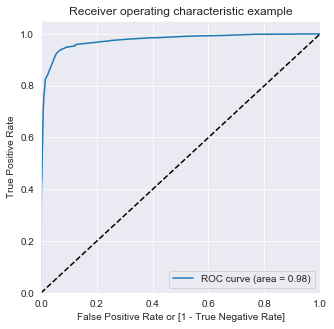

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.03122158e-04, 3.03122158e-04, 9.09366475e-04,
        1.21248863e-03, 1.21248863e-03, 1.51561079e-03, 1.51561079e-03,
        1.51561079e-03, 2.12185511e-03, 2.42497727e-03, 3.03122158e-03,
        3.03122158e-03, 3.03122158e-03, 3.03122158e-03, 7.27493180e-03,
        7.27493180e-03, 7.27493180e-03, 7.27493180e-03, 1.00030312e-02,
        1.03061534e-02, 1.03061534e-02, 1.45498636e-02, 1.45498636e-02,
        1.45498636e-02, 1.45498636e-02, 1.45498636e-02, 1.45498636e-02,
        2.24310397e-02, 2.39466505e-02, 2.39466505e-02, 2.39466505e-02,
        2.39466505e-02, 2.39466505e-02, 4.36495908e-02, 4.36495908e-02,
        4.48620794e-02, 5.54713550e-02, 5.57744771e-02, 5.63807214e-02,
        6.24431646e-02, 6.48681419e-02, 7.82055168e-02, 7.941800

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**Area Under the Curve**

In [117]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [118]:
auc = auc_val(fpr,tpr)
auc

0.9754240684199684

### Optimal cutoff point

For this we will need to create columns with different cutoff probabilities.

In [119]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head() 

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.972201,3101,1,1,1,1,1,1,1,1,1,1,1
1,0,0.003592,2861,0,1,0,0,0,0,0,0,0,0,0
2,1,0.992117,8432,1,1,1,1,1,1,1,1,1,1,1
3,0,0.078108,5091,0,1,0,0,0,0,0,0,0,0,0
4,1,0.972201,345,1,1,1,1,1,1,1,1,1,1,1


Now we will calculate the accuracy, sensitivity, and specificity for all the different probability cutoff values

In [120]:
cutoff_df = pd.DataFrame( columns = ['Prob','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df) 

     Prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.413824     1.000000     0.000000
0.1   0.1  0.849858     0.972520     0.763262
0.2   0.2  0.925906     0.948476     0.909973
0.3   0.3  0.930526     0.942894     0.921794
0.4   0.4  0.936212     0.925719     0.943619
0.5   0.5  0.932836     0.901245     0.955138
0.6   0.6  0.931414     0.896093     0.956350
0.7   0.7  0.920753     0.842422     0.976053
0.8   0.8  0.918088     0.822671     0.985450
0.9   0.9  0.913468     0.811507     0.985450


Now we will plot Accuracy, Sensitivity and Specificity for different values of cutoff probability

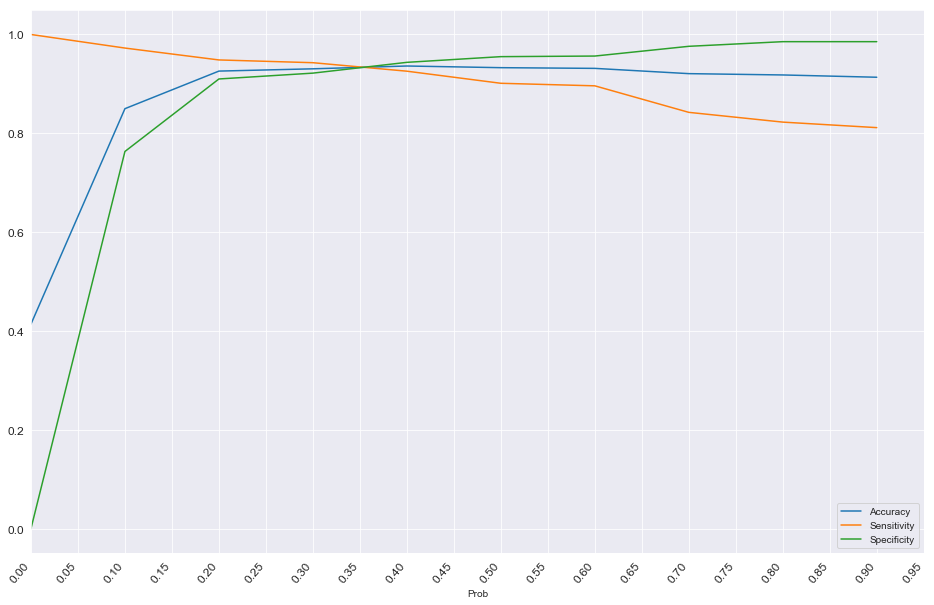

In [121]:
cutoff_df.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'], figsize=(16,10))
plt.xticks(np.arange(0, 1, step=0.05), size = 12, rotation=50, horizontalalignment='right')
plt.yticks(size = 12)
plt.show() 

We can see that **0.35** is our optimum cutoff probability.

In [122]:
y_train_pred_final['Final'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head() 

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final
0,0,0.972201,3101,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.003592,2861,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.992117,8432,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.078108,5091,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.972201,345,1,1,1,1,1,1,1,1,1,1,1,1


In [182]:
conversion_score_35  = (sum(y_train_pred_final['Final'])/len(y_train_pred_final['Final'].index))*100
print(conversion_score_35) 

42.253020611229566


We will now find the probability at which 80% conversion occurs.

In [129]:
y_train_pred_final['Final_0.01'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.01 else 0) 
print((sum(y_train_pred_final['Final_0.01'])/len(y_train_pred_final['Final_0.01'].index))*100)
y_train_pred_final['Final_0.02'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.02 else 0)
print((sum(y_train_pred_final['Final_0.02'])/len(y_train_pred_final['Final_0.02'].index))*100)
y_train_pred_final['Final_0.03'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.03 else 0)
print((sum(y_train_pred_final['Final_0.03'])/len(y_train_pred_final['Final_0.03'].index))*100) 

86.38948116560057
73.0632551528074
72.17484008528785


In [183]:
y_train_pred_final['Final_0.011'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.011 else 0)
print((sum(y_train_pred_final['Final_0.011'])/len(y_train_pred_final['Final_0.011'].index))*100)

86.38948116560057


In [130]:
y_train_pred_final['Final_0.012'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.012 else 0)
print((sum(y_train_pred_final['Final_0.012'])/len(y_train_pred_final['Final_0.012'].index))*100) 

85.98081023454158


In [132]:
y_train_pred_final['Final_0.013'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.013 else 0)
print((sum(y_train_pred_final['Final_0.013'])/len(y_train_pred_final['Final_0.013'].index))*100) 

79.26439232409382


In [131]:
y_train_pred_final['Final_0.014'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.014 else 0)
print((sum(y_train_pred_final['Final_0.014'])/len(y_train_pred_final['Final_0.014'].index))*100)

79.26439232409382


Therefore, as the business problem states that we need 80% conversion, we will set the probability cutoff at 0.012 for this target.

We will check overall accuracy for our final prediction

In [133]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final)

0.935501066098081

Confusion matrix

In [134]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final)
confusion1

array([[3093,  206],
       [ 157, 2172]], dtype=int64)

In [135]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

**Sensitivity**

In [136]:
TP / float(TP+FN)

0.9325890940317733

**Specificity**

In [137]:
TN / float(TN+FP)

0.937556835404668

**False Positive Rate**

In [138]:
FP/ float(TN+FP)

0.06244316459533192

**Positive Predictive Value**

In [139]:
TP / float(TP+FP)

0.913372582001682

**Negative Predictive Value**

In [140]:
TN / float(TN+ FN)

0.9516923076923077

### Precision and Recall

In [141]:
from sklearn.metrics import precision_score, recall_score

**Precision**

In [142]:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.Final) 
precision

0.913372582001682

**Recall**

In [143]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Final) 
recall

0.9325890940317733

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

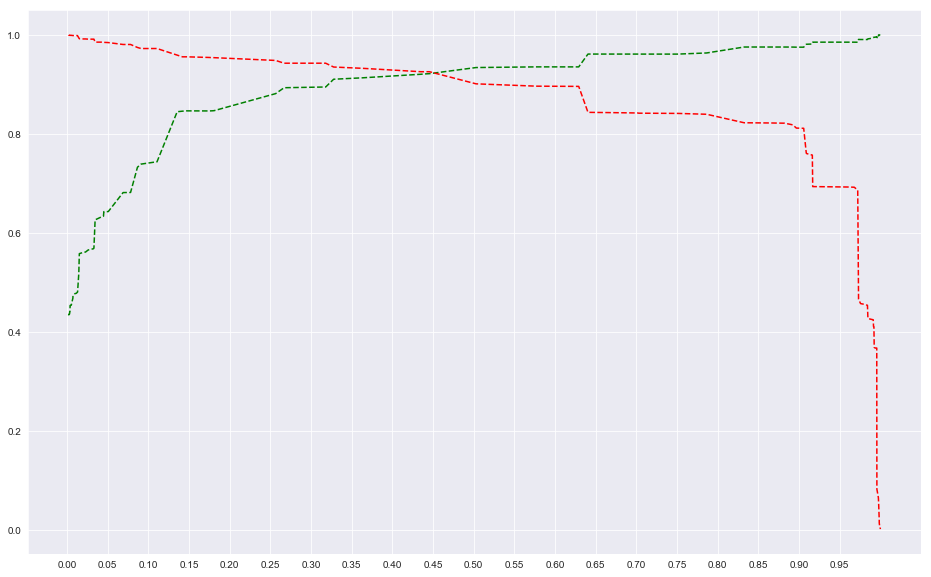

In [146]:
plt.figure(figsize=(16, 10))
plt.plot(thresholds, p[:-1], "g--")
plt.plot(thresholds, r[:-1], "r--")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the Precision-Recall curve we get the optimum cutoff probability as **0.45**.  
But since the business requirement is to have 80% conversion which is already achieved with our previous cutoff at **0.35**, we'll stick with that.

### F1 Score

In [147]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.9228808158062459

## Making Predictions on the Test set

In [148]:
scaling_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])
X_test[scaling_columns].head() 

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2608,0.438725,-0.247654,0.283575
6312,-0.651084,-0.907619,-1.168066
9032,-0.287815,1.526115,-0.200306
8593,0.438725,-0.236805,0.283575
5404,-0.106180,-0.365182,0.283575


In [149]:
X_test = X_test[col]
X_test.columns

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_NA',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off', 'Lead Quality_Worst',
       'Lead Profile_NA', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [150]:
y_test_pred = res.predict(sm.add_constant(X_test)) 

In [151]:
y_test_pred[:10] 

2608    0.003592
6312    0.012947
9032    0.180866
8593    0.033053
5404    0.078108
1678    0.972201
5272    0.972201
1353    0.110615
2484    0.180866
4280    0.012947
dtype: float64

In [152]:
y_pred_df = pd.DataFrame(y_test_pred) 
y_pred_df = y_pred_df.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_df.head()

,Conversion_Prob
2608,0.003592
6312,0.012947
9032,0.180866
8593,0.033053
5404,0.078108


In [153]:
y_test_df = pd.DataFrame(y_test) 
y_test_df['LeadID'] = y_test_df.index
y_test_df.head() 

,Converted,LeadID
2608,0,2608
6312,0,6312
9032,1,9032
8593,0,8593
5404,0,5404


In [154]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)
y_pred_final.head() 

,LeadID,Converted,Conversion_Prob
0,2608,0,0.003592
1,6312,0,0.012947
2,9032,1,0.180866
3,8593,0,0.033053
4,5404,0,0.078108


Using the **0.35** cutoff probability to make predictions on the test set

In [155]:
y_pred_final['Final'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0) 

In [156]:
y_pred_final.head() 

,LeadID,Converted,Conversion_Prob,Final
0,2608,0,0.003592,0
1,6312,0,0.012947,0
2,9032,1,0.180866,0
3,8593,0,0.033053,0
4,5404,0,0.078108,0


**Accuracy**

In [157]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final) 

0.9341069208454207

In [158]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final)
confusion2

array([[1363,   91],
       [  68,  891]], dtype=int64)

<pre>
Predicted      not converted    converted
Actual
not converted           1363           91
converted                 68          891
</pre>

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

**Sensitivity**

In [160]:
TP / float(TP+FN)

0.9290928050052137

**Specificity**

In [161]:
TN / float(TN+FP)

0.937414030261348

**False Positive Rate**

In [162]:
FP/ float(TN+FP)

0.06258596973865199

**Positive Predictive Value**

In [163]:
TP / float(TP+FP)

0.9073319755600815

**Negative Predictive Value**

In [164]:
TN / float(TN+ FN)

0.9524807826694619

**Precision**

In [165]:
precision2 = precision_score(y_pred_final.Converted, y_pred_final.Final) 
precision2

0.9073319755600815

**Recall**

In [166]:
recall2 = recall_score(y_pred_final.Converted, y_pred_final.Final) 
recall2

0.9290928050052137

In [167]:
F1 = 2*(precision2*recall2)/(precision2+recall2)
F1

0.9180834621329212

In [168]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False) 

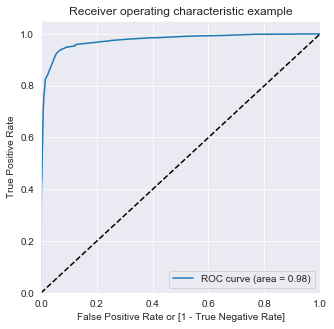

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.03122158e-04, 3.03122158e-04, 9.09366475e-04,
        1.21248863e-03, 1.21248863e-03, 1.51561079e-03, 1.51561079e-03,
        1.51561079e-03, 2.12185511e-03, 2.42497727e-03, 3.03122158e-03,
        3.03122158e-03, 3.03122158e-03, 3.03122158e-03, 7.27493180e-03,
        7.27493180e-03, 7.27493180e-03, 7.27493180e-03, 1.00030312e-02,
        1.03061534e-02, 1.03061534e-02, 1.45498636e-02, 1.45498636e-02,
        1.45498636e-02, 1.45498636e-02, 1.45498636e-02, 1.45498636e-02,
        2.24310397e-02, 2.39466505e-02, 2.39466505e-02, 2.39466505e-02,
        2.39466505e-02, 2.39466505e-02, 4.36495908e-02, 4.36495908e-02,
        4.48620794e-02, 5.54713550e-02, 5.57744771e-02, 5.63807214e-02,
        6.24431646e-02, 6.48681419e-02, 7.82055168e-02, 7.941800

In [169]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob) 

In [170]:
auc2 = auc_val(fpr,tpr)
auc2

0.9765373433181342

#### Summary
**Train data**
<pre>
Accuracy        93.55
Sensitivity     93.26
Specificity     93.75
F1 Score        92.29
</pre>
**Test data**
<pre>
Accuracy        92.91
Sensitivity     93.74
Specificity     93.74
F1 Score        91.81
</pre>

**Cross Validation Score**

In [171]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy) 

[0.86052304 0.86176837 0.90310559 0.90434783 0.90559006 0.91169154
 0.91293532 0.92164179 0.92661692 0.94029851]
0.9048518965085774


## Calculating Lead Score for the dataset

Let's define lead Score as Probability * 100
We need to calculate this for the entire dataset, i.e. both the Train and Test data

In [172]:
leads_test_pred = y_pred_final.copy(deep=True)
leads_test_pred.head() 

,LeadID,Converted,Conversion_Prob,Final
0,2608,0,0.003592,0
1,6312,0,0.012947,0
2,9032,1,0.180866,0
3,8593,0,0.033053,0
4,5404,0,0.078108,0


In [173]:
leads_train_pred = y_train_pred_final.copy(deep=True)
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final,Final_0.01,Final_0.02,Final_0.03,Final_0.012,Final_0.014,Final_0.013
0,0,0.972201,3101,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.003592,2861,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.992117,8432,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.078108,5091,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
4,1,0.972201,345,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Dropping the columns not required

In [174]:
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','Final']]
leads_train_pred.head() 

,LeadID,Converted,Conversion_Prob,Final
0,3101,0,0.972201,1
1,2861,0,0.003592,0
2,8432,1,0.992117,1
3,5091,0,0.078108,0
4,345,1,0.972201,1


In [175]:
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head() 

,LeadID,Converted,Conversion_Prob,Final
0,3101,0,0.972201,1
1,2861,0,0.003592,0
2,8432,1,0.992117,1
3,5091,0,0.078108,0
4,345,1,0.972201,1


We will make sure that there are no duplicates in the final dataframe by checking the Lead IDs

In [176]:
lead_full_pred.duplicated("LeadID").unique() 

array([False])

As all values are False, we can be sure there are no duplicates.

In [177]:
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head() 

,LeadID,Converted,Conversion_Prob,Final,Lead_Score
0,3101,0,0.972201,1,97
1,2861,0,0.003592,0,0
2,8432,1,0.992117,1,99
3,5091,0,0.078108,0,8
4,345,1,0.972201,1,97


Setting LeadID as index

In [178]:
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head() 

,Converted,Conversion_Prob,Final,Lead_Score
LeadID,,,,
0,0,0.014464,0,1
1,0,0.012947,0,1
2,1,0.972201,1,97
3,0,0.003592,0,0
4,1,0.905768,1,91


We will now add the Lead Number column from the original dataset to this one so we can identify the lead easily.

In [179]:
lead_number = df_leads[['Lead Number']]
leads_with_score = pd.concat([lead_number, lead_full_pred], axis=1)
leads_with_score.head() 

,Lead Number,Converted,Conversion_Prob,Final,Lead_Score
0,660737,0.0,0.014464,0.0,1.0
1,660728,0.0,0.012947,0.0,1.0
2,660727,1.0,0.972201,1.0,97.0
3,660719,0.0,0.003592,0.0,0.0
4,660681,1.0,0.905768,1.0,91.0


### Importance of Selected Features

We will now check the coefficients of the features we selected from our final model, excluding the constant.

In [180]:
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                     3.063853
Last Activity_SMS Sent                           1.865540
Tags_Busy                                        2.367566
Tags_Closed by Horizzon                          9.056725
Tags_Lost to EINS                                8.950947
Tags_NA                                          3.458496
Tags_Ringing                                    -1.403897
Tags_Will revert after reading the email         6.484550
Tags_in touch with EINS                          2.668553
Tags_switched off                               -1.995453
Lead Quality_Worst                              -2.328995
Lead Profile_NA                                 -2.612999
Asymmetrique Activity Index_03.Low              -1.538771
Last Notable Activity_Modified                  -1.291556
Last Notable Activity_Olark Chat Conversation   -1.246577
dtype: float64

Relative coefficient value with respect to the feature with the highest coefficient

In [181]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                      33.829588
Last Activity_SMS Sent                            20.598389
Tags_Busy                                         26.141527
Tags_Closed by Horizzon                          100.000000
Tags_Lost to EINS                                 98.832043
Tags_NA                                           38.187044
Tags_Ringing                                     -15.501156
Tags_Will revert after reading the email          71.599276
Tags_in touch with EINS                           29.464877
Tags_switched off                                -22.032830
Lead Quality_Worst                               -25.715646
Lead Profile_NA                                  -28.851480
Asymmetrique Activity Index_03.Low               -16.990372
Last Notable Activity_Modified                   -14.260735
Last Notable Activity_Olark Chat Conversation    -13.764108
dtype: float64

So the top 3 variables are **Tags**, **Lead Source** and **Last Activity**, and the top 3 features are _'Tags_Closed by Horizzon'_, _'Tags_Lost to EINS'_, _'Lead Source_Welingak Website'_.

### Conclusion

For **80%** conversion, we will set the probability cutoff at **0.012**, and follow up with all the leads that are above this cutoff, i.e. any lead with a score of **1.2** or more needs to be followed up.